# Advanced object detection

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import advanced_object_detection as aod
from preprocessing import shuffle,\
    histogramEqualization, histogramStretching, applyNormalization, adaptiveHistogramEqualization, resize
from utils import ModelSaver
import keras.backend as K

Using TensorFlow backend.


In [3]:
images = aod.getImages()

In [4]:
labels = aod.getLabels()

In [4]:
paris_images = aod.getParisDatasetImages()

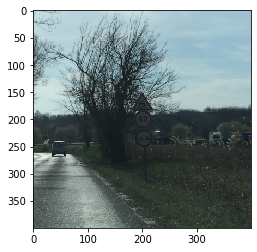

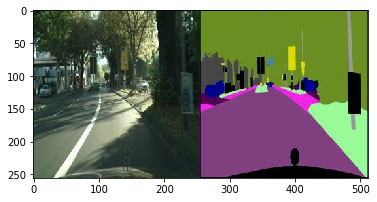

In [5]:
plt.imshow(images['images'][0])
plt.show()
plt.imshow(paris_images[0][0])
plt.show()

## Generate dataset

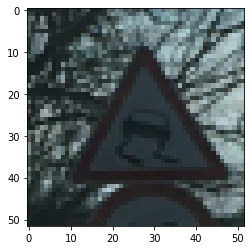

In [6]:
img = aod.getRandomImageOfSign(images['images'][0], images['signs'][0][0], 1.8)
plt.imshow(img[0])

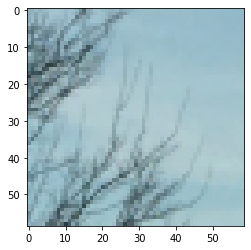

In [7]:
img = aod.getRandomImageOfBlank(images['images'][0], images['signs'][0], images['boundaries'][0], 1.8)
plt.imshow(img)

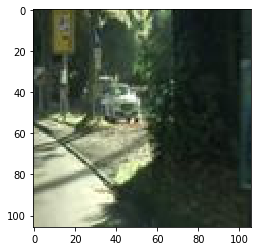

In [8]:
img = aod.getRandomImageOfParisDataset(paris_images[0][0])
plt.imshow(img)

In [11]:
xTrain, yTrain = aod.generateTrainingDataset(images['images'][20:], images['signs'][20:], images['boundaries'][20:], 100, 1.8)
xTest, yTest = aod.generateTrainingDataset(images['images'][:20], images['signs'][:20], images['boundaries'][:20], 100, 1.8)

In [12]:
xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((33800, 48, 48, 3), (33800, 5), (7600, 48, 48, 3), (7600, 5))

In [13]:
xTrain, yTrain = aod.appendFurtherImages(paris_images[0][80:], xTrain, yTrain)
xTest, yTest = aod.appendFurtherImages(paris_images[0][:80], xTest, yTest)

In [14]:
np.sum(yTrain[..., 0]) / yTrain.shape[0]

0.4378238341968912

In [15]:
xTrain, yTrain = shuffle(xTrain, yTrain)
xTest, yTest = shuffle(xTest, yTest)

In [16]:
def showImageWithRect(image, rect):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    w, h, x, y = rect
    w, h, x, y = 48 * w, 48 * h, 48 * x, 48 * y
    x1, y1 = x - w / 2, y - h / 2
    rect = patches.Rectangle((x1, y1),w, h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.show()

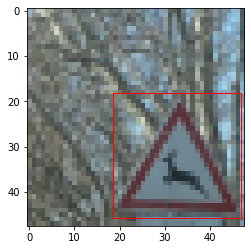

In [26]:
showImageWithRect(xTest[7], yTest[7][1:])

In [18]:
ModelSaver('data/advanced_dataset').save({
    'xTrain': xTrain, 'yTrain': yTrain,
    'xTest': xTest, 'yTest': yTest
})

In [3]:
data = ModelSaver('data/advanced_dataset').load()
xTrain, yTrain, xTest, yTest = data['xTrain'], data['yTrain'], data['xTest'], data['yTest']

## Training an object detector

In [36]:
cnns = [
    aod.Cnn(aod.preprocessor(histogramEqualization)),
    aod.Cnn(aod.preprocessor(histogramStretching)),
    aod.Cnn(aod.preprocessor(adaptiveHistogramEqualization))
]

In [7]:
cnns[0].model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 48)        2352      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 48)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 24)        18456     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 24)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3456)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3456)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)              

In [37]:
[ cnn.train(xTrain, yTrain, xTest, yTest, 6) for cnn in cnns ]

/home/balassa/anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Preprocessing took 30 s
Train on 38600 samples, validate on 8600 samples
Epoch 1/6
 - 91s - loss: 0.6595 - val_loss: 0.4078
Epoch 2/6
 - 91s - loss: 0.2121 - val_loss: 0.3137
Epoch 3/6
 - 91s - loss: 0.1491 - val_loss: 0.1931
Epoch 4/6
 - 91s - loss: 0.1226 - val_loss: 0.1892
Epoch 5/6
 - 90s - loss: 0.1171 - val_loss: 0.1556
Epoch 6/6
 - 96s - loss: 0.1008 - val_loss: 0.2217
Training model took 550 s
Preprocessing took 22 s
Train on 38600 samples, validate on 8600 samples
Epoch 1/6
 - 92s - loss: 0.5089 - val_loss: 0.1999
Epoch 2/6
 - 92s - loss: 0.1724 - val_loss: 0.1429
Epoch 3/6
 - 92s - loss: 0.1273 - val_loss: 0.0921
Epoch 4/6
 - 94s - loss: 0.1131 - val_loss: 0.2234
Epoch 5/6
 - 94s - loss: 0.0914 - val_loss: 0.0870
Epoch 6/6
 - 92s - loss: 0.0920 - val_loss: 0.1034
Training model took 557 s
Preprocessing took 485 s
Train on 38600 samples, validate on 8600 samples
Epoch 1/6
 - 95s - loss: 0.5751 - val_loss: 0.3847
Epoch 2/6
 - 90s - loss: 0.1924 - val_loss: 0.1475
Epoch 3/6
 - 9

[None, None, None]

In [39]:
[ cnn.train(xTrain, yTrain, xTest, yTest, 3) for cnn in cnns ]

/home/balassa/anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Preprocessing took 30 s
Train on 38600 samples, validate on 8600 samples
Epoch 1/3
 - 95s - loss: 0.0923 - val_loss: 0.1560
Epoch 2/3
 - 91s - loss: 0.0923 - val_loss: 0.3381
Epoch 3/3
 - 91s - loss: 0.0967 - val_loss: 0.4031
Training model took 276 s
Preprocessing took 25 s
Train on 38600 samples, validate on 8600 samples
Epoch 1/3
 - 95s - loss: 0.0769 - val_loss: 0.1044
Epoch 2/3
 - 95s - loss: 0.0890 - val_loss: 0.0755
Epoch 3/3
 - 92s - loss: 0.0684 - val_loss: 0.1301
Training model took 281 s
Preprocessing took 503 s
Train on 38600 samples, validate on 8600 samples
Epoch 1/3
 - 95s - loss: 0.0878 - val_loss: 0.1106
Epoch 2/3
 - 93s - loss: 0.0866 - val_loss: 0.1541
Epoch 3/3
 - 92s - loss: 0.0860 - val_loss: 0.2224
Training model took 279 s


[None, None, None]

Predicted 99.81 % chance of object
Expected: 100.0 %
[0.9981514612833658, 0.6935025, 0.6766491, 0.5096415, 0.48938146]


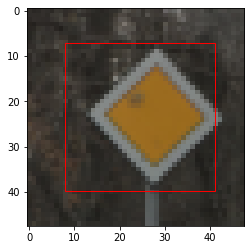

In [ ]:
for i in range(0, 100):
    aod.showPrediction(cnns, xTest[i], yTest[i])

In [33]:
cnns = [ 
    aod.Cnn(aod.preprocessor(histogramEqualization)).save('1eq'),
    aod.Cnn(aod.preprocessor(histogramStretching)).save('1stretch'),
    aod.Cnn(aod.preprocessor(adaptiveHistogramEqualization)).save('1adeq')
]

In [72]:
cnns = [ 
    aod.Cnn(aod.preprocessor(histogramEqualization)).load('eq'),
    aod.Cnn(aod.preprocessor(histogramStretching)).load('stretch'),
    aod.Cnn(aod.preprocessor(adaptiveHistogramEqualization)).load('adeq')
]

In [80]:
aod.runStatistics(cnns, xTest[:100], yTest[:100])

(0.0, 0.2222222222222222, 0.6216216216216216, 1.0)

## Object detection

In [5]:
images = images['images']

In [6]:
model = aod.ObjectDetector([cnn.model for cnn in cnns])

NameError: name 'cnns' is not defined

In [ ]:
model.showPrediction(*aod.getPreprocessed(images[1]))

In [176]:
model.load()

In [180]:
model2 = aod.ObjectDetector()
model2.load()

/home/balassa/anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Detection took 1.33 s
[[  0.99999801 176.7526269  222.49830067 203.98465395 246.14477158]
 [  0.94550625 178.45195383 223.84725362 154.53440994 197.94570357]]


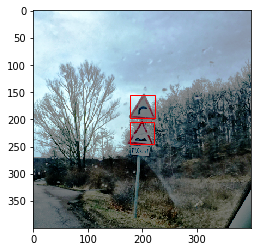

In [181]:
model2.showPrediction(*aod.getPreprocessed(images[1]))

## Object detection with classification

In [7]:
detector = aod.TrafficSignDetector()

In [8]:
objects, classes = detector.detect(images[1])

/home/balassa/anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Image preprocessing took 0.15 s
Image resizing took 1.02 s
Prediction took 0.93 s
Detection took 1.96 s
Classifications took 0.25 s


Image preprocessing took 0.11 s
Image resizing took 0.89 s
Prediction took 0.27 s
Detection took 1.17 s
Classifications took 0.02 s
Predition took 1.45 s


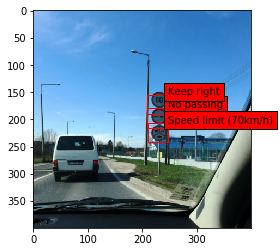

In [19]:
detector.showDetection(images[92], labels)

In [13]:
objects

array([[  0.99999801, 173.59061807, 225.9292262 , 200.82264513,
        249.3067804 ],
       [  0.94550625, 175.19610681, 227.25190111, 151.27856292,
        201.20155059]])